# Funnel Analysis
A [queensai.com](https://www.queensai.com/) original project created by mentor [Samantha Lam](https://www.linkedin.com/in/samanthalam/).

## What is funnel analysis? 

Tomi Mester has an excellent blog post on this: https://data36.com/funnel-analysis/

"Funnel analysis is a powerful analytics method that shows visually the conversion between the most important steps of the user journey." 

One of the most common types of analysis in industry is an onboarding funnel analysis, which are the steps that a user goes from registering on a website to the point they do a key action that the product offers. Examples of a key action in onboarding funnels could be:
- for a music-streaming service like Spotify, this could be when a user presses play for a song
- for an email provider such as Gmail, this could be when a user sends an email
- for a mobile game like Candy Crush, this could be from when a user downloads the app to when they have completed their first level.

**Come up with your own ideas around other online services you know on what a key action they would want their user to perform to get an understanding of what their product does!**


In this project we will go through how we would do this at Mentimeter (https://www.mentimeter.com/). If you don't already know what Mentimeter is, I highly recommend you check it out ;) In essence, Mentimeter is an interactive presentation platform where you can engage the audience with real-time interaction such as polls and word clouds.

The key action we want the registered user to engage in to understand the value of Mentimeter is to present live in front of an audience. In other words, when a user's presentation has received 2 votes or more.

*Note: Each Step corresponds roughly to one week of the course at queensai so the discussion points each week will revolve around the topic in the Step.*

-----------------------


### Week 1 Course Material

What is Python and how to install
- How to install Python + Jupyter notebook on your laptop!	https://www.codecademy.com/articles/install-python3
- More on installing python	https://realpython.com/installing-python/

#### Learn
- What is a variable? It's a box with a name https://www.youtube.com/watch?v=OPBxRcosIaU
- How to use a jupyter notebook: 
 - https://www.dataquest.io/blog/jupyter-notebook-tutorial/
 - https://www.youtube.com/watch?v=1QDvkkdyGw0
- Lessons 1 & 2 https://www.udacity.com/course/introduction-to-python--ud1110

#### Inspiration
- A little bit of fun history https://www.python-course.eu/python3_history_and_philosophy.php 
- Where To Start Learning How To Code https://www.youtube.com/watch?v=-1SmUivH9dQ
- How can I become a good programmer, for beginners https://www.youtube.com/watch?v=2-VKC8g2u1Y

### Step #1: Define the steps of your funnel + understand the data!

Typically in a company you would need to understand how this is tracked in the data ecosystem. This data is often stored in some form of database that would require SQL to get this data out. The end result can be stored as a csv so let's imagine that we have someone to help us with the pulling of data but we still need to *define* what is needed.

What do we need to know to start? We want to create an onboarding funnel at Mentimeter so let's define the steps required:
- Registration
- Create a presentation
- Edit a presentation
- Presented live

So what kind of information do we need for each of these steps for us to understand how a user goes from one step to another? Well, the first thing is that we need an identifier for the user! Without this, there is no way we can know who has completed which step.

How do we represent a user? We use what is called a user ID. A user ID is a unique identifier, commonly used to log on to a website, app, or online service, e.g. it may be a username, account number, or email address. (You can read a bit more about this at: https://techterms.com/definition/user_id). So if it is a username, what data type would that be? What about an account number? Or an email address then?

In [1]:
# User ID is a username
user_id = 'ilovepython'
type(user_id)

str

In [2]:
# User ID is an account number
user_id = 123456
type(user_id)

int

In [3]:
# User ID is an email address
user_id = 'ilovepython@email.com'
type(user_id)

str

In the case of this project, our user IDs are stored as account numbers, in other words, integers.

So we can identify a user, what else do we need? 
The onboarding step and the time at which it happened. We want the onboarding step to know what action the user has done, and the time at which it happened. These three pieces of information is one of the most common ways data is tracked about a user. Who, what and when.

What would the data type of the onboarding step be? Let's say they are the words 'Registration', 'Create a presentation', 'Edit a presentation', and 'Presented live'. I bet this is straightforward.

In [4]:
# Onboarding step
onboarding_step1 = 'Registration'
type(onboarding_step1)
onboarding_step2 = 'Create a presentation'
type(onboarding_step2)
onboarding_step3 = 'Edit a presentation'
onboarding_step4 = 'Presented live'

print(type(onboarding_step1),type(onboarding_step4),type(onboarding_step3) ,type(onboarding_step4))

<class 'str'> <class 'str'> <class 'str'> <class 'str'>


How about when something happens, i.e. when the event was created at? This one is trickier. How can time be represented in Python?

In [5]:
created_at1 = '2020-09-01 09:10:08'
type(created_at1)

str

In [6]:
created_at2 = '2020-09-01 09:20:08'
type(created_at2)

str

In [7]:
created_at2-created_at1

TypeError: unsupported operand type(s) for -: 'str' and 'str'

This *looks* nice, but we also know that there is actually a data type dedicated to time in python that gives us some nice functionality related to time that we don't get from strings (https://docs.python.org/3/library/datetime.html)

In [8]:
import datetime as dt # dt is the alias for datetime
created_at1 = dt.datetime(2020, 9, 1, 9, 10, 8)
created_at2 = dt.datetime(2021, 9, 1, 10, 20, 8)

print(created_at1, created_at2)

2020-09-01 09:10:08 2021-09-01 10:20:08


In [9]:
time_diff = created_at2-created_at1
time_diff

datetime.timedelta(365, 4200)

In [10]:
print(time_diff.days, time_diff.seconds)

365 4200


So, due to the flexibility that this object type gives us, we decide that the created_at data we get is a 'datetime.datetime' object.

Now that we are clear about the data we need, and what object types they should be, let's import this data file and take a peek at it looks like.

In [11]:
# Import the data file
import csv
data=[]
with open('onboarding_funnel_data.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in datareader:
        data.append(row)

In [12]:
data[0:10]

[['user_id,funnel_step,timestamp,device'],
 ['3695,edit,2020-01-04 22:44:44,desktop'],
 ['10204,live,2020-01-05 00:22:50,desktop'],
 ['10399,live,2020-01-05 04:45:55,desktop'],
 ['7536,edit,2020-01-05 03:10:15,desktop'],
 ['6578,edit,2020-01-04 22:40:19,desktop'],
 ['801,create,2020-01-04 23:14:42,desktop'],
 ['4416,registration,2020-01-05 01:05:31,mobile'],
 ['10501,edit,2020-01-05 00:53:17,desktop'],
 ['1037,create,2020-01-05 06:10:27,desktop']]

Does this look weird?

In [13]:
data[0]

['user_id,funnel_step,timestamp,device']

If you look carefully, you'll notice that the value in the array is a whole string, rather than 4 separate ones for each column. Why this happens is because the delimiter used is a semi-colon (;) and not a comma (,) which is what the csv we are importing uses. Let's try again!

In [14]:
# Import the data file
import csv
data=[]
with open('onboarding_funnel_data.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in datareader:
        data.append(row)

In [15]:
data[0:10]

[['user_id', 'funnel_step', 'timestamp', 'device'],
 ['3695', 'edit', '2020-01-04 22:44:44', 'desktop'],
 ['10204', 'live', '2020-01-05 00:22:50', 'desktop'],
 ['10399', 'live', '2020-01-05 04:45:55', 'desktop'],
 ['7536', 'edit', '2020-01-05 03:10:15', 'desktop'],
 ['6578', 'edit', '2020-01-04 22:40:19', 'desktop'],
 ['801', 'create', '2020-01-04 23:14:42', 'desktop'],
 ['4416', 'registration', '2020-01-05 01:05:31', 'mobile'],
 ['10501', 'edit', '2020-01-05 00:53:17', 'desktop'],
 ['1037', 'create', '2020-01-05 06:10:27', 'desktop']]

This looks a lot better!

--------------------------

### Week 2 Course Material

#### Learn
- Lessons 3 & 4 https://www.udacity.com/course/introduction-to-python--ud1110
- Functions, Sequences, Iterations: Python Programming Bootcamp 2020 | Learn to Code in Python [Tutorial and Exercises] https://www.youtube.com/watch?v=KPuA3Vq4yvY&t=0s
- Python Functions https://www.youtube.com/watch?v=u-OmVr_fT4s
- The first 5 sections, Introduction to DataFrame https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm

#### Inspiration
- How To Stay Motivated When Learning To Code https://www.youtube.com/watch?v=a0wY2TBs3zY
- Dealing with Stress and Anxiety When Learning to Code https://www.youtube.com/watch?v=anfszzl3GpA

### Step #2: More data manipulation + initial visualisation

- Always check the data!
- Let's try out some different ways of visualising the same thing. Which is most effective for understanding?

**NB: from now on, not every code snippet will run. Where there is a '?', you need to fill in the appropriate code.**

After we import and understand what kind of information the dataset contains, we can start cleaning the dataset before stepping into analysis stage. The data cleaning process is very important to make sure that the dataset we had has met our criteria and to make sure the conclusion resulted from it is correct.

In [16]:
# how many rows does the dataset have? i.e. how big is it
len(data)

35775

In [17]:
# you can also check how many columns by referring to the row
len(data[0])

4

In [18]:
X=?
Y=?
print('This is an array of size '+ X +' by '+ Y )

This is an array of size 35775 by 4


In [19]:
# Fill in the ? to show the first 10 rows
data[?:?]

[['user_id', 'funnel_step', 'timestamp', 'device'],
 ['3695', 'edit', '2020-01-04 22:44:44', 'desktop'],
 ['10204', 'live', '2020-01-05 00:22:50', 'desktop'],
 ['10399', 'live', '2020-01-05 04:45:55', 'desktop'],
 ['7536', 'edit', '2020-01-05 03:10:15', 'desktop'],
 ['6578', 'edit', '2020-01-04 22:40:19', 'desktop'],
 ['801', 'create', '2020-01-04 23:14:42', 'desktop'],
 ['4416', 'registration', '2020-01-05 01:05:31', 'mobile'],
 ['10501', 'edit', '2020-01-05 00:53:17', 'desktop'],
 ['1037', 'create', '2020-01-05 06:10:27', 'desktop']]

#### Remove duplicates
Nearly always, the very, very first thing you can do with a dataset is to check for duplicate data. To do this, you can loop through the dataset and count to see.

In [20]:
# Remove duplicates
# Beware: this is a slow way of doing this and it can take up to 5-10 mins to run - we will learn a faster method later :)

duplicate_data = []
unique_data = []

for row in data:
    if row in unique_data:
        duplicate_data.append(row)
    else:
        unique_data.append(row)
        
print('Number of unique rows : ', ?)
print('Number of duplicate rows : ', ?)

Number of unique rows :  35735
Number of duplicate rows :  40


In [21]:
# Since it took so long to run, let's save this to a file so we can retrieve it easily later
with open('onboarding_funnel_data_unique.csv', mode='w') as employee_file:
    data_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in unique_data:
        data_writer.writerow(row)

Let's look at our data again

In [22]:
# Show the first 10 rows of unique_data
?

[['user_id', 'funnel_step', 'timestamp', 'device'],
 ['3695', 'edit', '2020-01-04 22:44:44', 'desktop'],
 ['10204', 'live', '2020-01-05 00:22:50', 'desktop'],
 ['10399', 'live', '2020-01-05 04:45:55', 'desktop'],
 ['7536', 'edit', '2020-01-05 03:10:15', 'desktop'],
 ['6578', 'edit', '2020-01-04 22:40:19', 'desktop'],
 ['801', 'create', '2020-01-04 23:14:42', 'desktop'],
 ['4416', 'registration', '2020-01-05 01:05:31', 'mobile'],
 ['10501', 'edit', '2020-01-05 00:53:17', 'desktop'],
 ['1037', 'create', '2020-01-05 06:10:27', 'desktop']]

We see that there are 4 columns: user_id, funnel_step, timestamp, and source. Source looks to be a new piece of information. What does it look like it shows? Is this useful information?

Let's loop through the dataset and pick out all the values for column 4 and put it in a list.

In [23]:
column4 = []
for row in unique_data:
    column4.append(row[3])
    
# print the first 10 rows of column4
?

['device',
 'desktop',
 'desktop',
 'desktop',
 'desktop',
 'desktop',
 'desktop',
 'mobile',
 'desktop',
 'desktop',
 'mobile',
 'mobile',
 'desktop',
 'desktop',
 'desktop',
 'desktop',
 'mobile',
 'desktop',
 'desktop',
 'mobile']

In python, there is an in-built function called set (https://docs.python.org/2/library/sets.html based on mathematical set theory), that has a nice feature that can tell you the unique elements of a list. 

In [24]:
set(column4)

{'desktop', 'device', 'mobile'}

From this we can see that there are only two types of devices in the dataset: desktop and mobile.

Let's try this again for some of the other columns. And rather than copy and pasting the same code snippet, we can create a function to do this.

In [25]:
def show_uniques(dataset, column_number):
    temp = []
    for row in dataset:
        temp.append(row[?]) # remember python indices start at 0
        
    return set(temp)

In [26]:
# unique values in column 4
show_uniques(unique_data, 4)

{'desktop', 'device', 'mobile'}

In [27]:
# unique values in column 2
?

{'create', 'edit', 'funnel_step', 'live', 'registration', 'test'}

For the user_id and timestamp columns, we can see that they are quite unique, so rather than printing out every value, it is more useful to see _how many_ of them there are.

In [28]:
# unique values in column 1
len(show_uniques(unique_data, 1))

11308

In [29]:
# unique values in column 3
?

23032

What have we learned about the dataset?  

In [30]:
print('There are '+ ? + ' unique users')
print('There are '+ ? + ' unique timestamps')

There are 11308 unique users
There are 23032 unique timestamps


#### Remove erroneous data
We also see that there is one step in the funnel that is not expected: 'test'. This is something that can happen when we are retrieving the dataset from source, some unintended events can easily get included unnecessarily. So let's use a loop to remove it.

In [31]:
for row in unique_data:
    if row[1]=='test':
        unique_data.remove(row)
    else:
        continue

In [32]:
show_uniques(unique_data, 2)

{'create', 'edit', 'funnel_step', 'live', 'registration', 'test'}

Hmm, here it looks like the 'test' funnel_step has not been completely removed. This is really strange. Do have any ideas why? Hint: re-run the deletion loop and search for those rows that have not been deleted in the csv directly.

In [33]:
for row in unique_data:
    if row[1]=='test':
        unique_data.remove(row)
        print('The following row is removed: ', str(row))
    else:
        continue

The following row is removed:  ['7221', 'test', '2020-01-04 23:53:34', 'desktop']
The following row is removed:  ['4268', 'test', '2020-01-05 03:26:16', 'desktop']
The following row is removed:  ['11032', 'test', '2020-01-05 00:20:56', 'desktop']
The following row is removed:  ['7999', 'test', '2020-01-04 23:55:55', 'desktop']
The following row is removed:  ['5013', 'test', '2020-01-04 20:08:13', 'desktop']
The following row is removed:  ['589', 'test', '2020-01-04 22:00:13', 'desktop']


The reason is because there were two 'test' rows in-a-row in the original csv, so when we were looping through the dataset and was checking if row x satisfied the if condition, we immediately removed it so everything shifted up one so the subsequent 'test' row got 'skipped' and we continued the loop on the next row. (See if you can explain this to a classmate, or if this is unclear, ask a mentor!) These type of strange errors is very common when you start out in programming, so always double-check that everything is going to plan!

So, let's try a slightly different approach.

In [34]:
# Re-import the data file since we have removed the duplicates using the less efficient method
unique_data=[]
with open('onboarding_funnel_data_unique.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in datareader:
        unique_data.append(row)

In [35]:
newdata=[]
for row in unique_data:
    if row[1] != 'test':
        newdata.append(row)
    else:
        continue

In [36]:
# show the uniques in row 2 of newdata

{'create', 'edit', 'funnel_step', 'live', 'registration'}

Now we have a new dataset 'newdata' that is created from 'data' and has exactly the 4 funnel steps we are interested in. The next check we should do is what we prepared for, when we specified the data we wanted -- what type they should be. Let's create a function that checks for all the types under one column.

In [37]:
def show_datatypes(dataset, column_number):
    temp = []
    for row in dataset:
        temp.append(type(row[column_number-1])) # remember python indices start at 0
        
    return set(temp)

In [38]:
show_datatypes(newdata,1)

{str}

In [39]:
# show the data types for column 2
?

{str}

In [40]:
# show the data types for column 3
?

{str}

In [41]:
# show the data types for column 4
?

{str}

It looks like everything is a string - which, while flexible, means user_id and timestamp can contain letters and other characters which might not be what we want. Generally how we can see this straightaway, is that an integer like 123, is shown as '123' when we look at the values. We can use common sense as well as programmatic sense!

So, let's make the timestamp into a 'datetime.datetime' object and user_id into a integer object. Now instead of creating a function to loop through the elements, a neat functionality of python is list comprehensions (https://www.datacamp.com/community/tutorials/python-list-comprehension). Don't worry if you don't completely understand the tutorial, we will use a very simple example of it. However, this is something that is good to know and to revisit when you are more comfortable with programming in general as it helps with optimisation (making code faster). 

Do you understand how the dt.datetime part works? (Hint: remember dt.datetime(2021, 9, 1, 10, 20, 8) from Week 1)


In [42]:
# hint: use X:Y to define the range of elements you are interested in in i[2], and remember to cast it to an integer!
year = ?
month = ?
day = ? 
hour = ?
minute = ?
second = ?

[dt.datetime(year, month, day, hour, minute, second) for i in newdata[1:]]

[datetime.datetime(2020, 1, 4, 22, 44, 44),
 datetime.datetime(2020, 1, 5, 0, 22, 50),
 datetime.datetime(2020, 1, 5, 4, 45, 55),
 datetime.datetime(2020, 1, 5, 3, 10, 15),
 datetime.datetime(2020, 1, 4, 22, 40, 19),
 datetime.datetime(2020, 1, 4, 23, 14, 42),
 datetime.datetime(2020, 1, 5, 1, 5, 31),
 datetime.datetime(2020, 1, 5, 0, 53, 17),
 datetime.datetime(2020, 1, 5, 6, 10, 27),
 datetime.datetime(2020, 1, 5, 1, 56, 38),
 datetime.datetime(2020, 1, 5, 3, 42, 35),
 datetime.datetime(2020, 1, 4, 21, 36, 30),
 datetime.datetime(2020, 1, 4, 22, 48, 52),
 datetime.datetime(2020, 1, 4, 22, 2, 47),
 datetime.datetime(2020, 1, 5, 2, 21, 44),
 datetime.datetime(2020, 1, 5, 1, 26, 32),
 datetime.datetime(2020, 1, 4, 20, 41, 26),
 datetime.datetime(2020, 1, 4, 19, 29, 59),
 datetime.datetime(2020, 1, 5, 1, 15, 47),
 datetime.datetime(2020, 1, 4, 20, 28, 19),
 datetime.datetime(2020, 1, 5, 4, 38, 35),
 datetime.datetime(2020, 1, 5, 2, 45, 38),
 datetime.datetime(2020, 1, 5, 0, 49, 36),
 dat

This looks good! Now let's do the same for user_id.

In [43]:
[int(i[0]) for i in newdata[1:]]

ValueError: invalid literal for int() with base 10: '45tshghtnryy536366'

This looks strange! The warning is complaining that one of the values cannot be made into an integer. It seems to be in a format that is quite different - how would we identify this? 

Well, one thing we can see is that it is a long string. Let's count the length of values of user_ids.

In [44]:
# Counter is a very convenient function for counting items in a list, note the result is a dictionary
from collections import Counter
Counter([len(i[0]) for i in newdata[1:]])

Counter({1: 29, 2: 287, 3: 2780, 4: 28119, 5: 4086, 18: 13})

From this we can see that the majority of values are of length five or less, with 13 values that are length 18. After you confirm with developers, it seems that those are values of non-logged in users. So let's remove them, but this time using a list comprehension. (Note the extra work so we don't include the description row.)

In [45]:
newdata[0]

['user_id', 'funnel_step', 'timestamp', 'device']

In [46]:
# hint: again use X:Y to define the range of elements you are interested in, but this time for row[2]
cleandata_year = ?
cleandata_month = ?
cleandata_day = ? 
cleandata_hour = ?
cleandata_minute = ?
cleandata_second = ?

cleandata = [ [row[0], 
               row[1], 
               dt.datetime(cleandata_year, 
                           cleandata_month, 
                           cleandata_day, 
                           cleandata_hour, 
                           cleandata_minute, 
                           cleandata_second), 
               row[3]] for row in newdata[1:] 
             if len(row[0]) < 8] # we use 8 because remember the first row 'user_id' is length 7

In [47]:
# Now to do a little cleaning up to include the header row
cleandata_final = []
cleandata_final.append(newdata[0])
cleandata_final.extend(cleandata)
cleandata_final[0:5]

[['user_id', 'funnel_step', 'timestamp', 'device'],
 ['3695', 'edit', datetime.datetime(2020, 1, 4, 22, 44, 44), 'desktop'],
 ['10204', 'live', datetime.datetime(2020, 1, 5, 0, 22, 50), 'desktop'],
 ['10399', 'live', datetime.datetime(2020, 1, 5, 4, 45, 55), 'desktop'],
 ['7536', 'edit', datetime.datetime(2020, 1, 5, 3, 10, 15), 'desktop']]

We can confirm that they are removed:

In [48]:
len(?)-len(?)

13

In [49]:
# Again, let's save our clean data set to save our effort again
with open('onboarding_funnel_data_clean.csv', mode='w') as employee_file:
    data_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in cleandata_final:
        data_writer.writerow(row)

Finally, let's plot our first funnel! To do this, we need to decide what it is we are plotting of course! We want to see the number of users who completed each step of the funnel, which means we need to be able to count the number of users at each step. Shall we try some more list comprehensions to calculate this?

In [50]:
funnel = Counter([?[1] for i in newdata[1:]])

In [51]:
funnel.keys()

dict_keys(['live', 'registration', 'edit', 'create'])

In [52]:
funnel.values()

dict_values([6048, 11307, 8431, 9528])

Let's use the bar chart functionality from a graphing library called matplotlib to plot our first funnel.

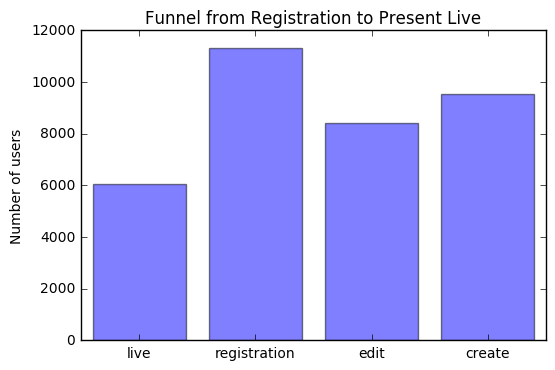

In [56]:
import matplotlib.pyplot as plt

objects = funnel.keys()
y_pos = range(len(funnel.keys()))
performance = funnel.values()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of users')
plt.title('Funnel from Registration to Present Live')

plt.show()

But hang on, this is not a funnel from high to low - we need to _order_ the of funnel!

In [57]:
from collections import OrderedDict 

ordered_funnel = OrderedDict((k, funnel.get(k)) for k in ['registration','create','edit','live'])
print(?) 

OrderedDict([('registration', 11307), ('create', 9528), ('edit', 8431), ('live', 6048)])


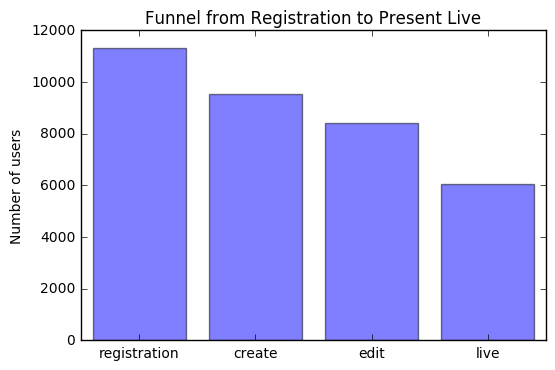

In [58]:
# Now plot the new funnel that is ordered
objects = ?.keys()
y_pos = range(len(?.keys()))
performance = ?.values()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of users')
plt.title('Funnel from Registration to Present Live')

plt.show()

Now we can see that the biggest drop appears to be from edit to live, and then from registration to create, and the smallest drop is between create and edit presentation. Interesting!

Give a pat on the back for yourself -- you have managed to clean the data using several functionalities of python and plot your first insightful graph. 


In next week's lesson you will learn how to use a collection of popular data science libraries to do this type of cleaning even faster and to plot some even more sophisticated graphs.


--------------------------

#### BONUS: Calculate time statistics

While we will not cover this as part of the project, if you want to challenge yourself a little more, try to calculate some time statistics for each funnel step!

Remember we wanted to use the datetime type for our timestamp? The following snippets shows you how to create a function that does some time calculation between two timestamps.


In [ ]:
# Create a function that calculates the total number of seconds
def get_total_seconds(time_difference):
        total_seconds = time_difference.days*86400 + time_difference.seconds # 86400 is the number of seconds in a day
        return(total_seconds)


In [ ]:
get_total_seconds(time_diff)

In [ ]:
get_total_seconds(created_at2)

Why is there an error? It says "AttributeError: 'datetime.datetime' object has no attribute 'days'" -- this means that created_at2, which is of the type datetime.datetime doesn't have an attribute 'days', which is what the object 'datetime.timedelta' (e.g. time_diff) has. To fix this, we must include some error handling in the function definition.

In [ ]:
# Create a function that calculates the total number of seconds
def get_total_seconds_better(time_difference):
        try:
            total_seconds = time_difference.days*86400 + time_difference.seconds # 86400 is the number of seconds in a day
            return(total_seconds)
        except:
            return(-1)            

In [ ]:
get_total_seconds_better(time_diff)

In [ ]:
get_total_seconds_better(created_at2)

### Week 3 Course Material

Install pandas
- The first 5 sections, from Introduction to DataFrame (includes installation) https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
- Install Pandas on Windows	https://data-flair.training/blogs/install-pandas-on-windows/
- Install Pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html

#### Learn
- Python: Pandas Tutorial, Intro to DataFrames 
 - (video) https://www.youtube.com/watch?v=e60ItwlZTKM
 - (article) https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Intro to Data Analysis / Visualization with Python, Matplotlib and Pandas | Matplotlib Tutorial https://www.youtube.com/watch?v=a9UrKTVEeZA

#### Inspiration
- The beauty of data visualization https://www.youtube.com/watch?v=5Zg-C8AAIGg

### Step #3: More funnels

- Calculate percentages
- Segmentation, which users is this onboarding good for, who are dropping off?

A bit of repetition

--------------------------

### Week 4 Course Material

#### Learn
- Refactoring:
 - What is code refactoring? https://www.youtube.com/watch?v=vhYK3pDUijkv (first 3 mins)
 - How to Refactor Code in Python: A Beginner's Guide https://hubpages.com/technology/How-To-Refactor-Code-In-Python-A-Beginners-Guide
 - 4 Simple Ways to Refactor Your Python Code https://medium.com/code-85/4-simple-ways-to-refactor-your-python-code-2f491b767381
 - Python Refactoring https://www.youtube.com/watch?v=KTIl1MugsSY
- What is Data Storytelling? https://www.nugit.co/what-is-data-storytelling/
- 5 Steps for Effective Data Storytelling https://www.qlik.com/us/-/media/files/resource-library/global-us/register/ebooks/EB-5-Steps-for-Effective-Data-Storytelling-EN

#### Inspiration
- Making data mean more through storytelling https://www.youtube.com/watch?v=6xsvGYIxJok
- Storytelling with Data (long) https://www.youtube.com/watch?v=8EMW7io4rSI

### Step #4: Reproducible analysis and actionable insights

- Refactor and reuse
- Combining the funnels together, what are the key take-aways?